## Simple Linear Regression

****Step 1: Reading and Understanding the Data****
* Importing data using the pandas library
* Understanding the structure of the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file

advt_df = pd.read_csv('Advertising_dataset.csv')

In [3]:
advt_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Let see inspect the various aspects of our data

In [4]:
advt_df.shape

(200, 4)

This tells us we have 200 rows and 4 features i.e columns

In [5]:
# print the rows and columns using a for loop
for i in range(advt_df.shape[0]):
    for j in range(advt_df.shape[1]):
        print(advt_df.iloc[i, j], end='\t')
    print()

230.1	37.8	69.2	22.1	
44.5	39.3	45.1	10.4	
17.2	45.9	69.3	12.0	
151.5	41.3	58.5	16.5	
180.8	10.8	58.4	17.9	
8.7	48.9	75.0	7.2	
57.5	32.8	23.5	11.8	
120.2	19.6	11.6	13.2	
8.6	2.1	1.0	4.8	
199.8	2.6	21.2	15.6	
66.1	5.8	24.2	12.6	
214.7	24.0	4.0	17.4	
23.8	35.1	65.9	9.2	
97.5	7.6	7.2	13.7	
204.1	32.9	46.0	19.0	
195.4	47.7	52.9	22.4	
67.8	36.6	114.0	12.5	
281.4	39.6	55.8	24.4	
69.2	20.5	18.3	11.3	
147.3	23.9	19.1	14.6	
218.4	27.7	53.4	18.0	
237.4	5.1	23.5	17.5	
13.2	15.9	49.6	5.6	
228.3	16.9	26.2	20.5	
62.3	12.6	18.3	9.7	
262.9	3.5	19.5	17.0	
142.9	29.3	12.6	15.0	
240.1	16.7	22.9	20.9	
248.8	27.1	22.9	18.9	
70.6	16.0	40.8	10.5	
292.9	28.3	43.2	21.4	
112.9	17.4	38.6	11.9	
97.2	1.5	30.0	13.2	
265.6	20.0	0.3	17.4	
95.7	1.4	7.4	11.9	
290.7	4.1	8.5	17.8	
266.9	43.8	5.0	25.4	
74.7	49.4	45.7	14.7	
43.1	26.7	35.1	10.1	
228.0	37.7	32.0	21.5	
202.5	22.3	31.6	16.6	
177.0	33.4	38.7	17.1	
293.6	27.7	1.8	20.7	
206.9	8.4	26.4	17.9	
25.1	25.7	43.3	8.5	
175.1	22.5	31.5	16.1	
89.7	9.9	35.7	10.6	
239.9	41.5	

In [6]:
advt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advt_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualizing the Data
Visualize the data using seaborn.
first make a pairplot of all the variables present to visualize which variables are most correlated to Sales.

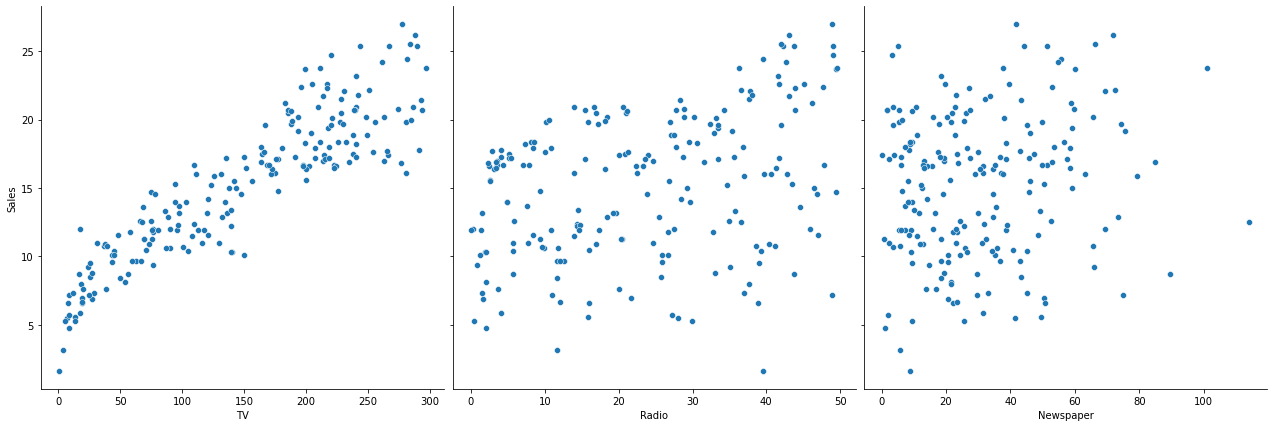

In [8]:
sns.pairplot(advt_df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=1, 
                                                                    kind='scatter', palette="husl")
plt.show()

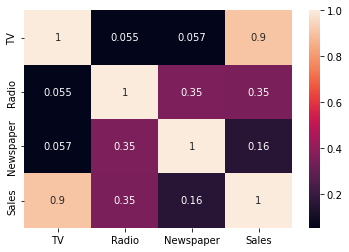

In [9]:
sns.heatmap(advt_df.corr(), annot = True)

plt.show()

In [10]:
advt_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Hypothesis Testing in Linear Regression
Before you move on to the model-building part, there is one theoretical aspect left to be addressed: 

The significance of the derived beta coefficient. When you fit a straight line through the data, you will obviously get the two parameters of the straight line, i.e., the intercept (β0) and the slope (β1). Now, while β0 is not of much importance right now, there are a few related aspects that need to be checked and verified. every time you perform a linear regression, you need to test whether the fitted line is significant or not, or to simply put it, you need to test whether β1 is significant or not. And here arrives the idea of hypothesis testing on β1.

You start by saying that β1 is not significant, i.e. there is no relationship between X and y.

So in order to perform the hypothesis test, you first propose the null hypothesis that β1 is 0. And the alternative hypothesis thus becomes β1 is not zero.

Null Hypothesis (H0): β1=0
Alternate Hypothesis (HA): β1≠0
Let's first discuss the implications of this hypothesis test. If you fail to reject the null hypothesis, that would mean that β1 is zero, which would simply mean that β1 is insignificant and of no use in the model. Similarly, if you reject the null hypothesis, it would mean that β1 is not zero and the line fitted is a significant one. Now, in order to perform the hypothesis test, you need to derive the p-value for the given beta. If you're hazy on what p-value is and how it is calculated,

* How you calculate p-value anyway:

Calculate the value of the t-score for the mean point (in this case, zero, according to the null hypothesis 
that we have stated) on the distribution.
Calculate the p-value from the cumulative probability for the given t-score using the t-table.
Make the decision on the basis of the p-value with respect to the given value of β  (significance level)

Now, if the p-value turns out to be less than 0.05, you can reject the null hypothesis and state that β1 is indeed significant.

Please note that all of the above steps will be performed by Python automatically

## Step 3: Performing Simple Linear Regression.

# Steps in Model building using statsmodel
We first assign the feature variable. 
TV in this case, to the variable x and the response variable Sales to the variable y.

In [12]:
x = advt_df['TV']

y = advt_df['Sales']

# Train-Test Split
* We now need to split our variable into training and testing sets. 

* We perform this by importing train_test_split from the sklearn.model_selection library. 

* It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [15]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

# Building Linear Model
We need to first import the statsmodel.api library using which we will perform the linear regression.

In [16]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. 
But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. 
And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line 
using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [17]:
# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)

# fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

     const     TV
79     1.0  116.0
197    1.0  177.0
38     1.0   43.1
24     1.0   62.3
122    1.0  224.0
..     ...    ...
106    1.0   25.0
14     1.0  204.1
92     1.0  217.7
179    1.0  165.6
102    1.0  280.2

[160 rows x 2 columns]


In [18]:
# print the parameters i.e intercept and the slope of the regression line fitted.
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.71e-59
Time:                        11:21:36   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

### The fit is significant. Let us visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:
    
Sales = 7.0071 + 0.055 x TV

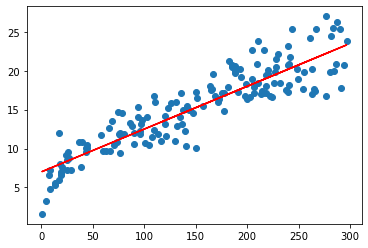

In [20]:
plt.scatter(X_train, y_train)

plt.plot(X_train, 7.0071 + 0.055 * X_train, 'r')

plt.show()

## Step 4: Residual Analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

In [21]:
y_train_pred = lr.predict(X_train_sm) # predicted

res = (y_train - y_train_pred)    # residuals = actual - predicted

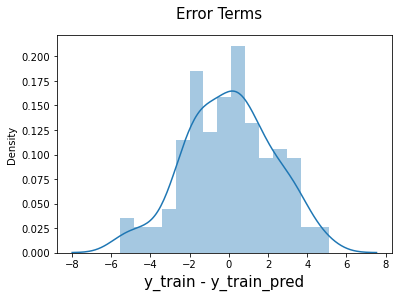

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize= 15)

plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

The residuals are normally distributed with a mean of 0, which indicates that everything is in order.

## Looking for patterns in the residuals.

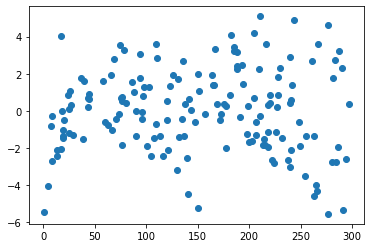

In [23]:
plt.scatter(X_train, res)
plt.show()

We have reason to believe that the model fit is not due to chance and has some degree of predictive capability. 
The normal distribution of the residual terms permits some interpretation of the coefficients.

However, the fact that the variance of the residuals increases with X suggests that there is substantial variability that this model cannot account for.

# Step 5: Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. 

For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## RMSE(Root Mean Squared Error)

In [27]:
# Return the mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

2.470035001123256

## R-squared on test data

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

## Visualizing the fit on the test set

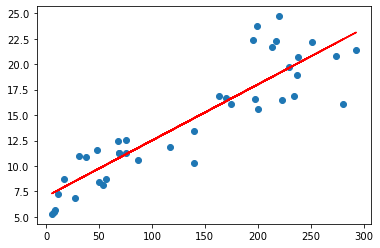

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0071 + 0.055 * X_test, 'r')
plt.show()

## Linear Regression using linear_model in sklearn

* Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. 

* We will use the linear_model library from sklearn to build the model. 

* Since, we have already performed a train-test split, we don't need to do it again.

* There's one small step that we need to add, though. When there's only a single feature.

* we need to add an additional column in order for the linear regression fit to be performed successfully.

In [30]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [31]:
X_train_lm.shape

(160,)

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

ValueError: Expected 2D array, got 1D array instead:
array=[215.4 175.7 164.5 218.5 120.2  89.7  16.9 248.8  70.6  38.2 202.5 171.3
  75.1 131.1 210.7  44.5  17.2  25.6 197.6  85.7 213.4 151.5 205.  142.9
 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1  38.  172.5 109.8 240.1
 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3 175.1 220.5  76.4 253.8
 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7 262.9 237.4 227.2 199.8
 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3 224.  198.9 276.7  13.2
  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3 213.5 293.6  18.7  75.5
 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6  36.9 199.1 265.2 165.6
 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9  25.   97.5  26.8 281.4
  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7 243.2 137.9  18.8  17.2
  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8 222.4 193.7  59.6 131.7
   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2 210.8  53.5  90.4 104.6
 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4  43.  248.4 116.  110.7
 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
X_train_lm = X_train_lm.values.reshape(-1,1)

X_test_lm = X_test_lm.values.reshape(-1,1)

In [34]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [35]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [36]:
print(lm.intercept_)
print(lm.coef_)

6.995532914307688
[0.05410548]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. 
# So we need to reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.

X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [41]:
X_train_scaled.shape

(140, 1)

In [42]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()

#'Fit' and transform the train set and transform using the fit on the test set later.
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [43]:
print(f"mean and sd for X_train_scaled:{np.mean(X_train_scaled)} {np.std(X_train_scaled)}")
print(f"mean and sd for y_train_scaled: {np.mean(y_train_scaled)}{np.std(y_train_scaled)}")

mean and sd for X_train_scaled:2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-161.0


In [44]:
# Let us fit the regression line following exactly the same steps as done before.
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [45]:
# Check the parameters
lr_scaled.params

array([-2.91433544e-16,  9.03212773e-01])

In [46]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.52e-52
Time:                        11:50:46   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16      0.037  -7.98e-15      1.0

***Model statistics and goodness of fit remain unchanged.
So why scale at all?**
* Helps with interpretation (we will be able to appreciate this better in later modules)
* Faster convergence of gradient descent.